<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #CC99FF;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Diabetes dataset
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset-using-many-medical-metrics/diabetes (1).csv


# Project. Diabetes dataset
## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Outcome

# Import Libraries & Read Dataset

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.inspection import permutation_importance
import itertools

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# For Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For Deep learning
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, LSTM, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [4]:
df = pd.read_csv('/kaggle/input/diabetes-dataset-using-many-medical-metrics/diabetes (1).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# EDA : Column Analysis

In [7]:
col_name_num = df.columns.tolist()  
col_name_num.remove('Outcome') 

fig = go.Figure()

for col in col_name_num:
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[col], name=col))

    fig.update_layout(
        title=f"Box Plot for {col}",
        yaxis_title="Values",
        title_font_size=25,
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white')
    )

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

    fig.show()

In [8]:
for column in df.columns[:-1]:  
    fig = px.histogram(df, x=column, color='Outcome', nbins=20)
    fig.update_layout(
        title=f'{column} Distribution by Outcome',
        xaxis_title=column,
        yaxis_title='Frequency',
        title_font_size=25,
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white')
    )
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
    fig.show()

# EDA : Column Correlation Analysis

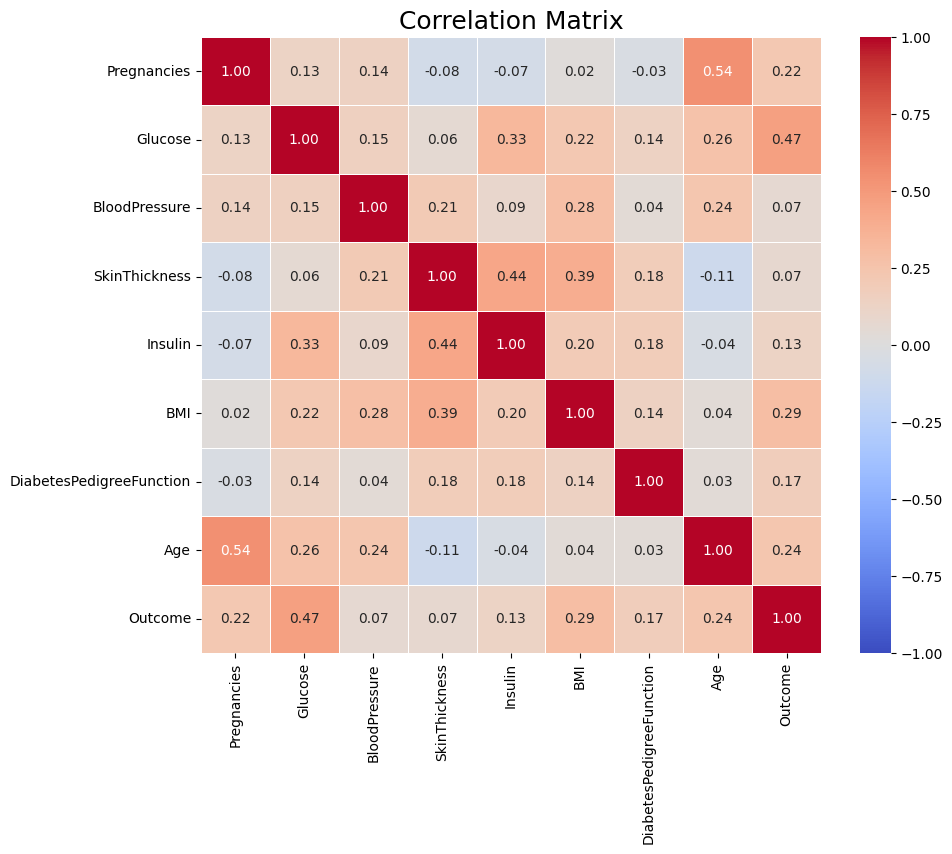

In [9]:
correlation_matrix = df.corr().round(3)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black')

plt.show()

# Machine learning

In [10]:
def evaluate_models(X, y):

    categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    encoder = OneHotEncoder(drop='first', sparse=False)
    X_categorical = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))

    scaler = StandardScaler()
    X_numerical = pd.DataFrame(scaler.fit_transform(X[numerical_columns]))

    X_processed = pd.concat([X_categorical, X_numerical], axis=1)

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression()),   
        ('Decision Tree Classifier', DecisionTreeClassifier()),
        ('Random Forest Classifier', RandomForestClassifier()),
        ('Support Vector Classifier', SVC()),
        ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
        ('XGBoost Classifier', XGBClassifier()),
        ('LightGBM Classifier', LGBMClassifier())
    ]

    results = {}
    for name, model in models:
        pipeline = Pipeline([('scaler', StandardScaler()), (name, model)])
        
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

    results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
    results_df.rename(columns={'index': 'Model'}, inplace=True)

    return results_df

In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

evaluate_models(X, y)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.753247,0.755394,0.753247,0.754191
1,Decision Tree Classifier,0.733766,0.749729,0.733766,0.738037
2,Random Forest Classifier,0.733766,0.732725,0.733766,0.733214
3,Support Vector Classifier,0.733766,0.727959,0.733766,0.729265
4,K-Nearest Neighbors Classifier,0.694805,0.687444,0.694805,0.689645
5,XGBoost Classifier,0.707792,0.717466,0.707792,0.711179
6,LightGBM Classifier,0.707792,0.720759,0.707792,0.711885


# Deep learning

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> # 1. ANN (Artificial Neural Network) : Not a time series (Recommended)

In [13]:
model_ANN = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history = model_ANN.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.4375 - loss: 0.7547

I0000 00:00:1719631350.236034      81 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.4870 - loss: 0.7657 - val_accuracy: 0.7236 - val_loss: 0.6459
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6051 - loss: 0.6908 - val_accuracy: 0.7073 - val_loss: 0.6097
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6479 - loss: 0.6310 - val_accuracy: 0.7073 - val_loss: 0.5890
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6869 - loss: 0.6110 - val_accuracy: 0.7236 - val_loss: 0.5693
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6947 - loss: 0.6005 - val_accuracy: 0.7154 - val_loss: 0.5483
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7358 - loss: 0.5725 - val_accuracy: 0.7398 - val_loss: 0.5300
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7417 - loss: 0.5323 - val_accuracy: 0.7317 - val_loss: 0.5190
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7110 - loss: 0.5667 - val_accuracy: 0.7398 - val_loss: 0

In [14]:
y_pred = (model_ANN.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred, zero_division=1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



> # 2. RNN (Recurrent Neural Network) : Not a time series (Not recommended)

In [15]:
X_train_rnn = pad_sequences(X_train.values, maxlen=10)
X_test_rnn = pad_sequences(X_test.values, maxlen=10)

model_RNN = Sequential([
    Embedding(input_dim=10, output_dim=64),
    SimpleRNN(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_RNN.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.6479 - loss: 0.6668 - val_accuracy: 0.6429 - val_loss: 0.6465
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6502 - loss: 0.6433 - val_accuracy: 0.6429 - val_loss: 0.6377
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6521 - loss: 0.6343 - val_accuracy: 0.6429 - val_loss: 0.6252
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6594 - loss: 0.6250 - val_accuracy: 0.6429 - val_loss: 0.6147
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6590 - loss: 0.6162 - val_accuracy: 0.6429 - val_loss: 0.6077
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6179 - loss: 0.6524 - val_accuracy: 0.6429 - val_loss: 0.6038
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6481 - loss: 0.6231 - val_accuracy: 0.6688 - val_loss: 0.6053
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6618 - loss: 0.6052 - val_accuracy: 0.6558 - val_los

In [16]:
y_pred = model_RNN.predict(X_test_rnn)
y_pred_binary = (y_pred > 0.5).astype(int)  

print(classification_report(y_test, y_pred_binary, zero_division=1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        99
           1       0.62      0.36      0.46        55

    accuracy                           0.69       154
   macro avg       0.67      0.62      0.62       154
weighted avg       0.68      0.69      0.67       154



> # 3. LSTM (Long Short-Term Memory) : Not a time series (Not recommended)

In [17]:
X_train_array = X_train.values
X_test_array = X_test.values

X_train_lstm = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_lstm = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))


model_LSTM = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])), 
    LSTM(64, activation='relu'), 
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_LSTM.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - accuracy: 0.5500 - loss: 4.5749 - val_accuracy: 0.6429 - val_loss: 1.2741
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5459 - loss: 2.6676 - val_accuracy: 0.6753 - val_loss: 0.6805
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5664 - loss: 1.6000 - val_accuracy: 0.6429 - val_loss: 0.6172
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6086 - loss: 1.0734 - val_accuracy: 0.6883 - val_loss: 0.6201
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5504 - loss: 0.9780 - val_accuracy: 0.6753 - val_loss: 0.6268
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 0.9256 - val_accuracy: 0.6688 - val_loss: 0.6292
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.7362 - val_accuracy: 0.6688 - val_loss: 0.6141
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6180 - loss: 0.7024 - val_accuracy: 0.6818 - val_lo

In [18]:
y_pred = model_LSTM.predict(X_test_lstm)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary, zero_division=1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        99
           1       1.00      0.05      0.10        55

    accuracy                           0.66       154
   macro avg       0.83      0.53      0.45       154
weighted avg       0.78      0.66      0.55       154



> # 4. GRU (Gated Recurrent Unit) : Not a time series (Not recommended)

In [19]:
X_train_gru = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_gru = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

inputs = Input(shape=(X_train_gru.shape[1], X_train_gru.shape[2]))

gru_layer = GRU(50, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(gru_layer)

model_GRU = Model(inputs=inputs, outputs=outputs)
model_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_gru = model_GRU.fit(X_train_gru, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.3148 - loss: 0.7229 - val_accuracy: 0.5610 - val_loss: 0.6950
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6657 - loss: 0.6783 - val_accuracy: 0.6098 - val_loss: 0.6673
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6517 - loss: 0.6468 - val_accuracy: 0.6098 - val_loss: 0.6415
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6652 - loss: 0.6028 - val_accuracy: 0.6585 - val_loss: 0.6194
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6776 - loss: 0.5838 - val_accuracy: 0.6423 - val_loss: 0.6068
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6910 - loss: 0.5649 - val_accuracy: 0.6911 - val_loss: 0.5898
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7327 - loss: 0.5437 - val_accuracy: 0.6911 - val_loss: 0.5839
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7523 - loss: 0.5520 - val_accuracy: 0.6911 - val_los

In [20]:
y_pred = model_GRU.predict(X_test_gru)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary, zero_division=1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



# Thanks